In [16]:
import cProfile
import pstats
def Stats(f):
    profile = cProfile.Profile()
    profile.runcall(f)
    ps = pstats.Stats(profile)
    ps.print_stats()

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('nonogram.csv')
M = Matrix(df.iloc[2494])

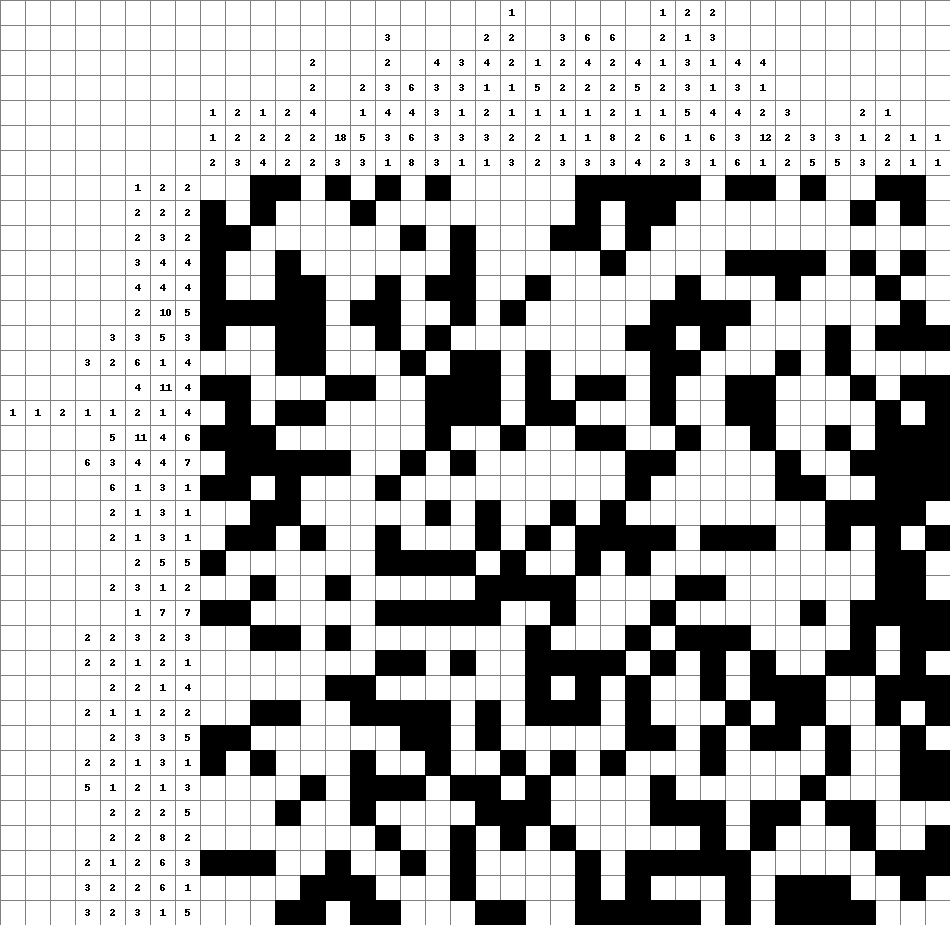

In [18]:
nagent = 3000
M.Mdraw((np.random.rand(*M.shape) < M.Sum/np.prod(M.shape)))

In [13]:
import random
from matplotlib import pyplot as plt
import seaborn as sns

nagent = 3000
nchildren = 10000
niteration = 100
mrate = 0.05
nmutate = 10

def crossover(agents,nchildren , M = 2):
        
    Aindicies = np.random.choice(range(len(agents)),size=((nchildren+1)*M,2))
    Aindicies = Aindicies[Aindicies[:,0] != Aindicies[:,1]][:nchildren]

    if(len(Aindicies) != nchildren):
        return crossover(agents,nchildren,M=M+1)
        
    shx,shy = agents[0].shape
    K = np.random.randint(0, shx-2,size = nchildren)
    L = np.random.randint(K+1, shx,size = nchildren)
    M = np.random.randint(0, shy-2,size = nchildren)
    N = np.random.randint(M+1, shy,size = nchildren)
    
    children = agents[Aindicies]
    for index in range(len(children)):
        k,l,m,n = K[index],L[index],M[index],N[index]
        children[index][0][k:l,m:n] = children[index][1][k:l,m:n]
    return [mutate(children[:,0])]

def mutate(agent):
  iagent = np.random.rand(agent.shape[0]) < mrate
  aiagent = agent[iagent]
  agent[iagent] = aiagent ^ (np.random.rand(*aiagent.shape) < nmutate/np.prod(M.shape))
  return agent

def Run( niteration, agents = np.random.rand(nagent,*M.shape) < M.Sum/np.prod(M.shape) ):
  for _ in range(niteration):
    agents = np.vstack([mutate(agents)]+crossover(agents,nchildren))     
    cost = M.advcost(agents)
    indices = np.argsort(cost)[:nagent]
    agents = agents[np.argsort(cost)[:nagent]]
    print(np.min(cost))
  return agents

#Agents = Run(100)

796.5833333333333
781.8333333333333
735.0
734.0
705.0
687.0
655.0
638.3846153846154
593.0
592.0
568.0
542.125
524.5
498.2857142857143
480.2857142857143


KeyboardInterrupt: 

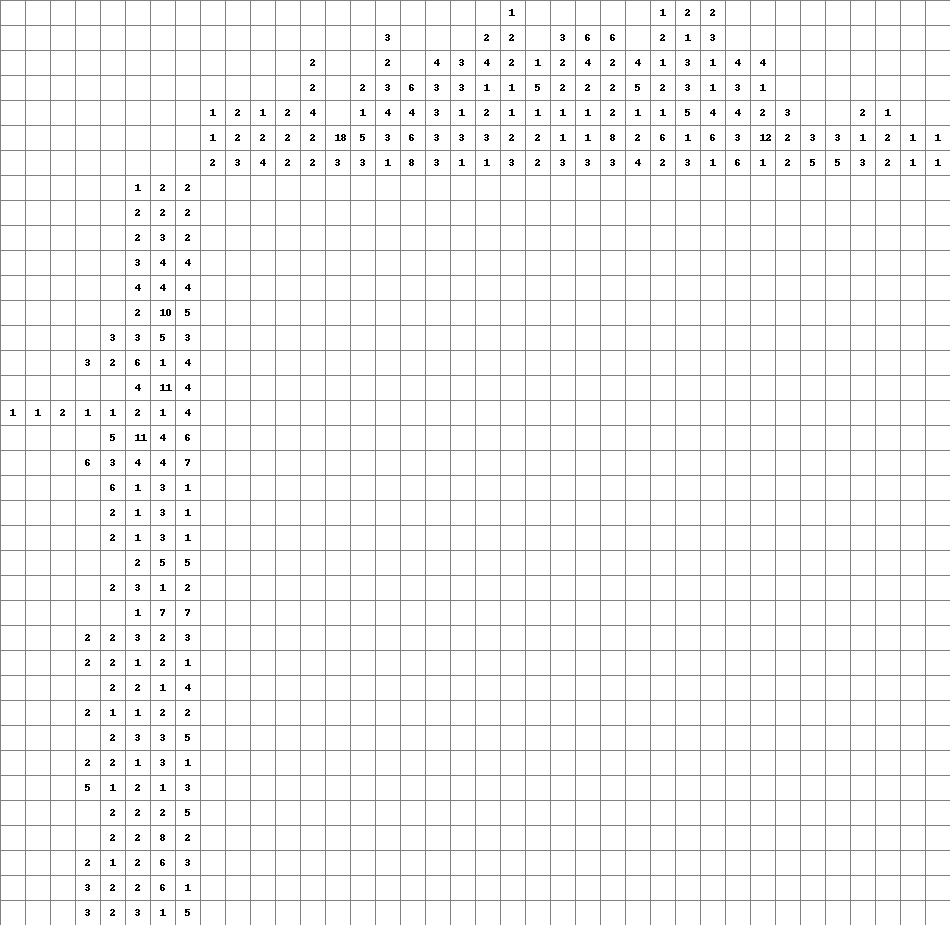

In [144]:
M.Mdraw()

In [145]:
M.solution

'http://static.nonograms.org/files/nonograms/large/statuya_svobodi_12_1_1p.png'

<AxesSubplot:>

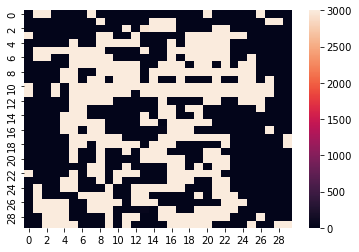

In [73]:
sns.heatmap(np.sum(Agents,axis= 0))

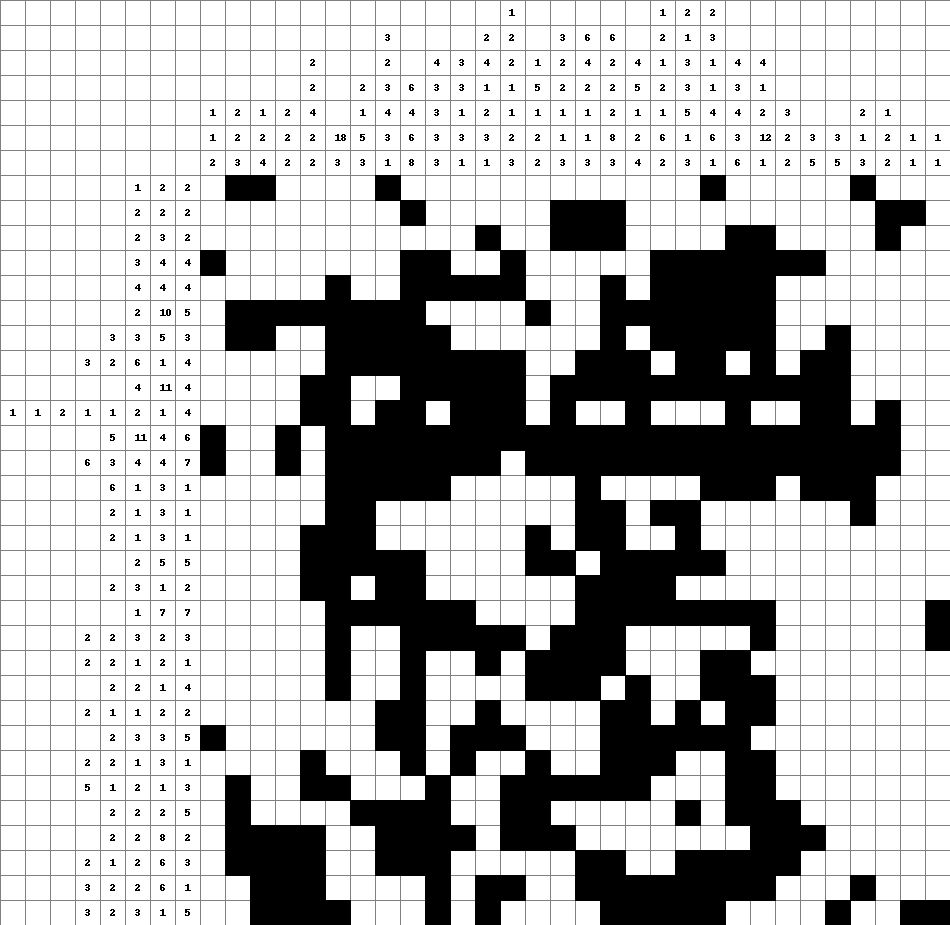

In [71]:
M.Mdraw(Agents[0])

In [138]:
nagent = 3000
nchildren = 10000
niteration = 100

nenvs = 10
nagent = 50
nchildren = 1000
niteration = 100000
mrate = 0.05
nmutate = 10

def crossover2D(agents,nchildren, M = 3):
    nenvs = agents.shape[0]
    totalchildren = nenvs * nchildren
    
    Aindicies = np.random.choice(range(len(agents[0])),size=((totalchildren+1)*M,2))
    Aindicies = Aindicies[Aindicies[:,0] != Aindicies[:,1]][:totalchildren]

    if(len(Aindicies) != totalchildren):
        return crossover2D(agents,nchildren,M=M+1)
    
    Aindicies = Aindicies.reshape((nenvs,nchildren,2))
    
    shx,shy = agents[0,0].shape
    K = np.random.randint(0, shx-2,size = (nenvs,nchildren))
    L = np.random.randint(K+1, shx,size = (nenvs,nchildren))
    M = np.random.randint(0, shy-2,size = (nenvs,nchildren))
    N = np.random.randint(M+1, shy,size = (nenvs,nchildren))
    
    envindicies = np.array(range(nenvs))
    envindicies = np.tile(envindicies, (2,nchildren,1)).T
    children = agents[envindicies,Aindicies]
    for index1 in range(nenvs):
        for index2 in range(nchildren):
            k,l,m,n = K[index1][index2],L[index1][index2],M[index1][index2],N[index1][index2]
            children[index1][index2][0][k:l,m:n] = children[index1][index2][1][k:l,m:n]
    return mutate(children[:,:,0])

def mutate(agent):
  iagent = np.random.rand(*agent.shape[:2]) < mrate
  aiagent = agent[iagent]
  agent[iagent] = aiagent ^ (np.random.rand(*aiagent.shape) < nmutate/np.prod(M.shape))
  return agent

def Run( niteration, agents = np.random.rand(nenvs,nagent, *M.shape) < M.Sum/np.prod(M.shape)):
  for _ in range(niteration):
    agents = np.concatenate([mutate(agents),crossover2D(agents,nchildren)],axis =1)  
    cost = M.advcost(agents.reshape(-1,*agents.shape[-2:])).reshape(agents.shape[:2])
    
    envindicies = np.array(range(nenvs))
    envindicies = np.tile(envindicies, (nagent,1)).T
    indicies = np.dstack([envindicies,cost.argsort()[:,:nagent]])    
    agents = agents[envindicies,cost.argsort()[:,:nagent]]

    fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (16,3))
    sns.heatmap(np.sum(np.sum(agents,axis= 0),axis= 0), ax=ax1)
    sns.heatmap(np.sum(agents[0],axis= 0), ax=ax2)
    sns.heatmap(np.sum(agents[1],axis= 0), ax=ax3)
    plt.show()
    
    print(np.min(cost))
    
  return agents

def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

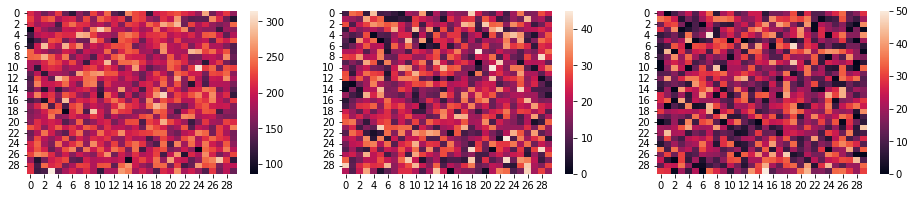

773.0


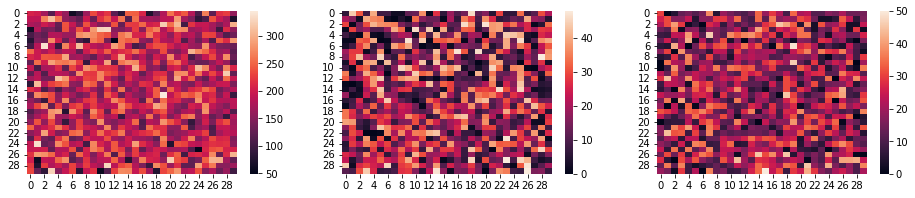

741.0


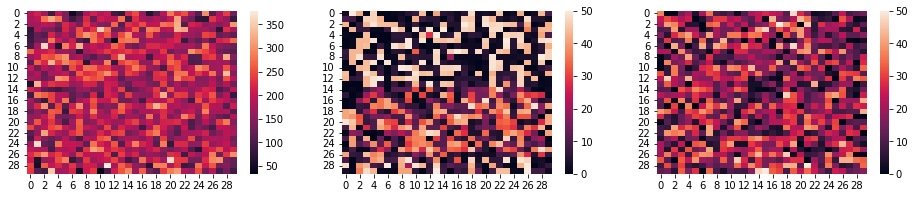

693.0


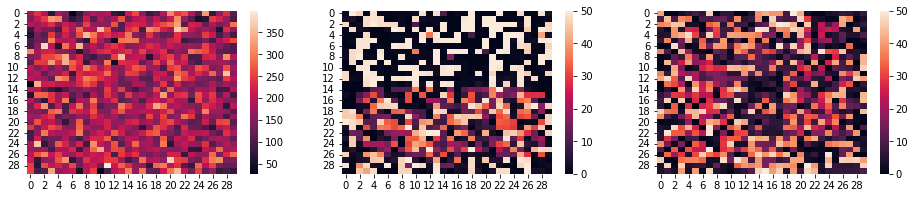

659.0


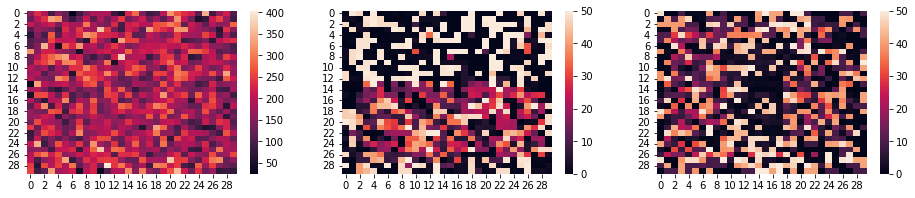

636.0


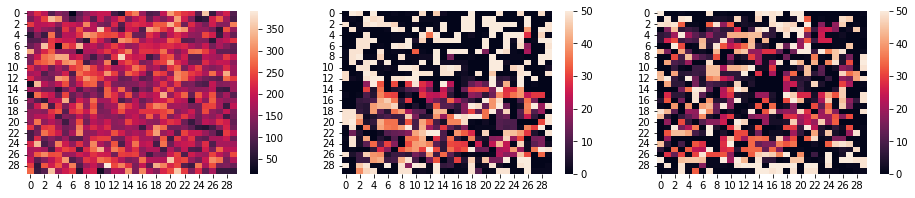

602.0


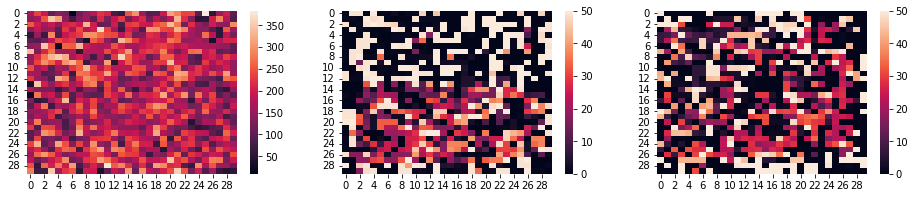

570.0


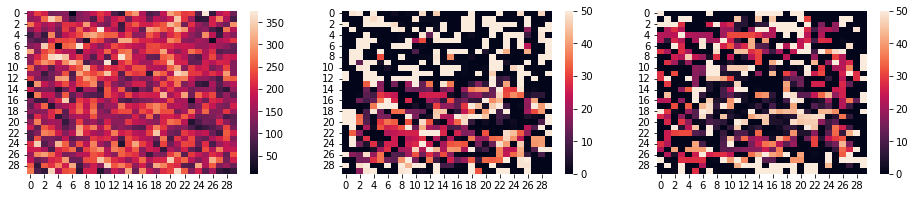

557.0


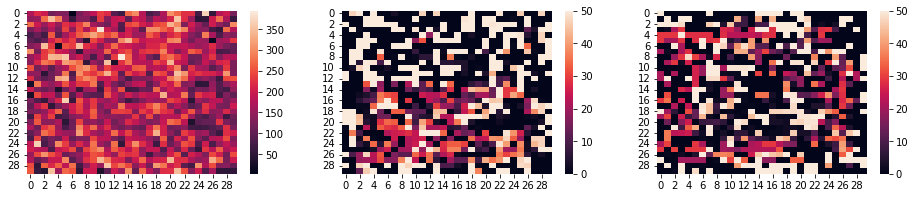

530.1875


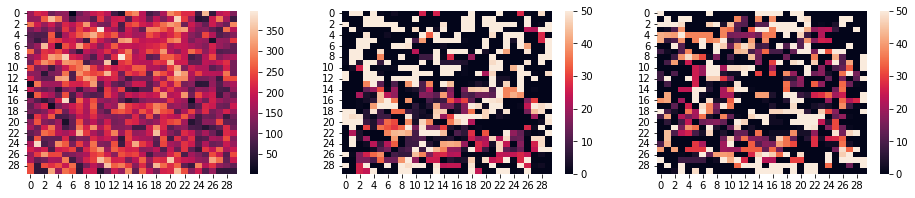

518.8333333333333


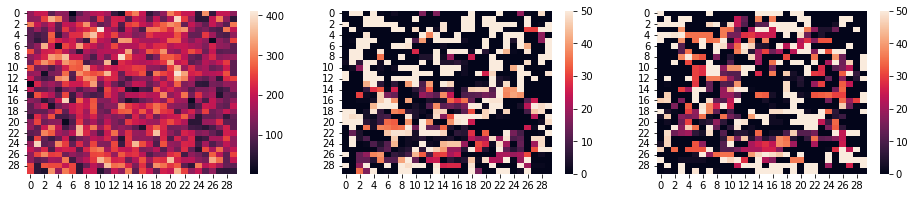

489.94444444444446


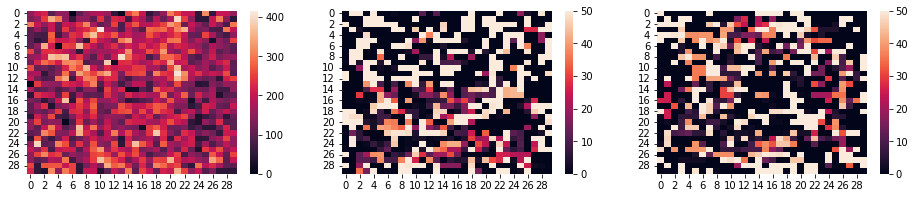

476.66666666666663


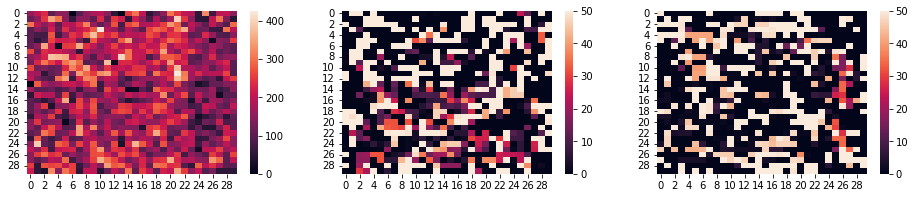

461.0


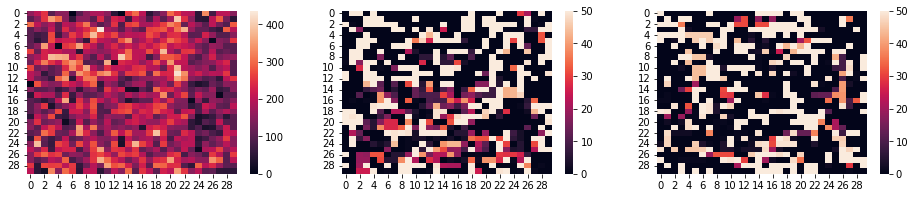

453.984126984127


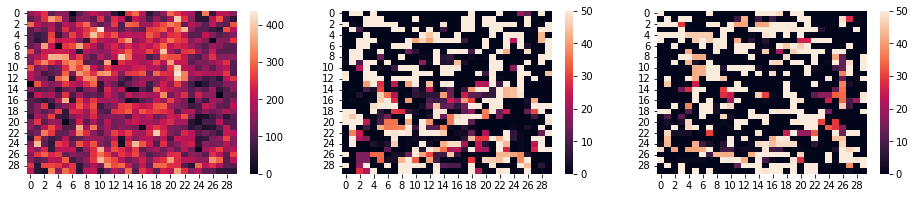

437.8571428571429


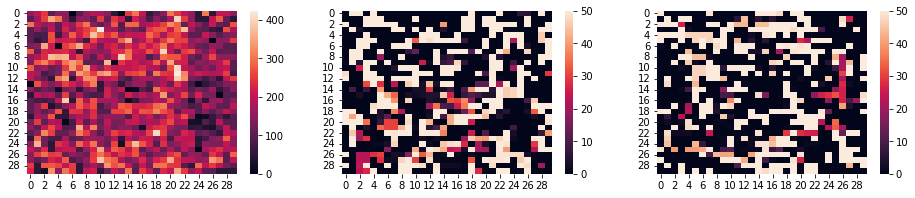

424.0


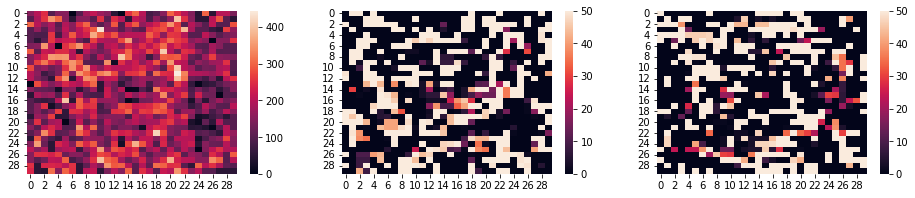

409.0


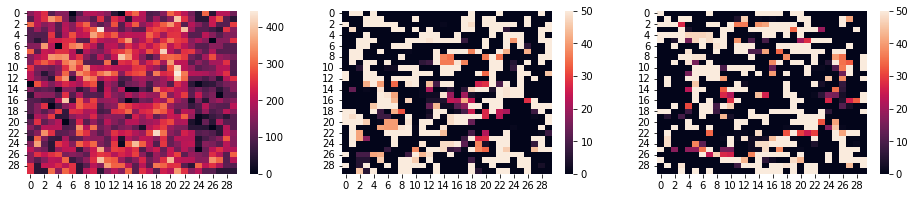

397.0


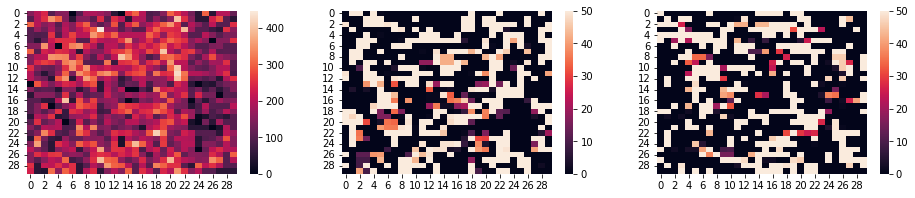

387.25174825174827


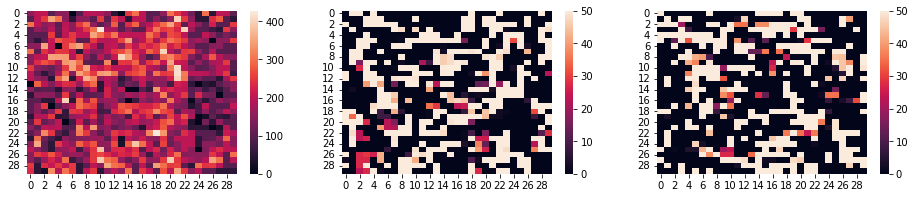

377.5


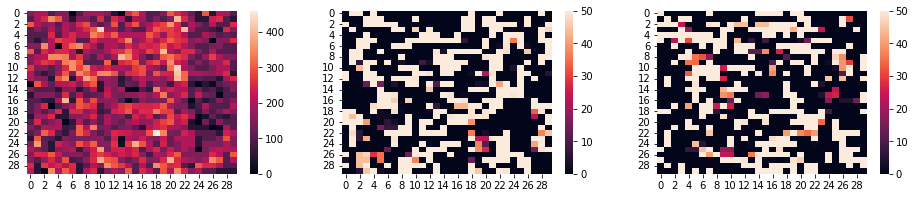

367.0


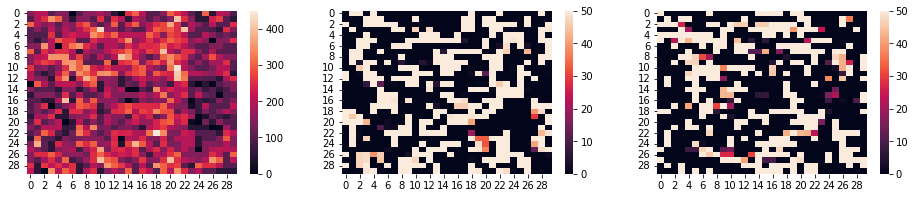

362.0


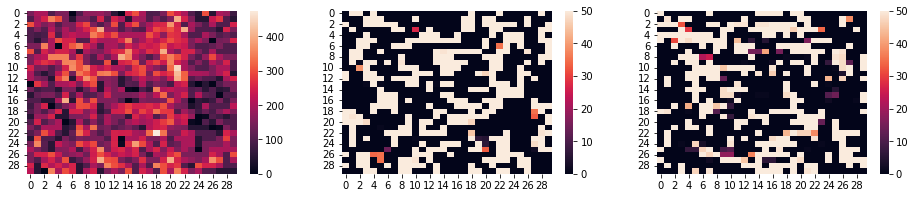

347.5833333333333


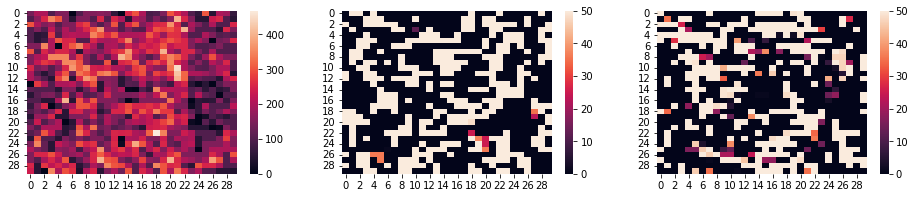

342.0


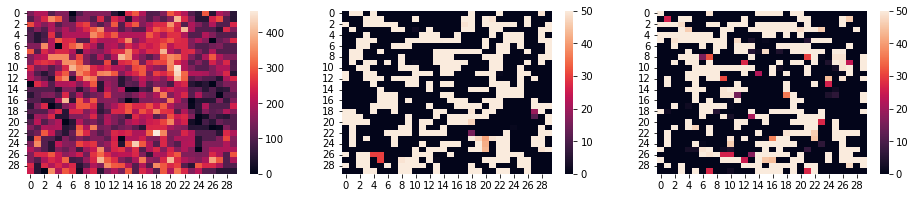

336.6363636363636


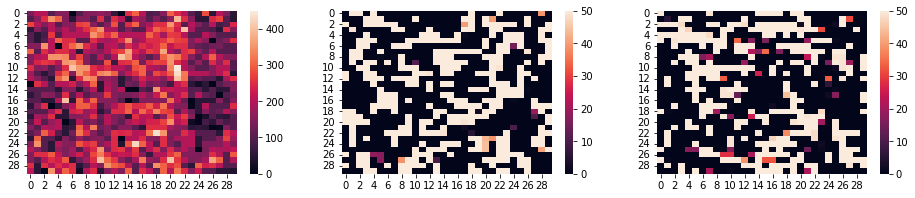

331.6363636363636


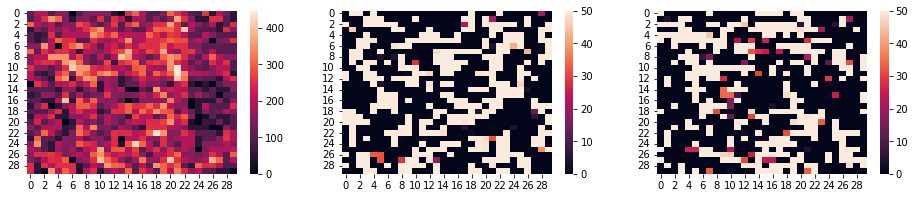

324.0


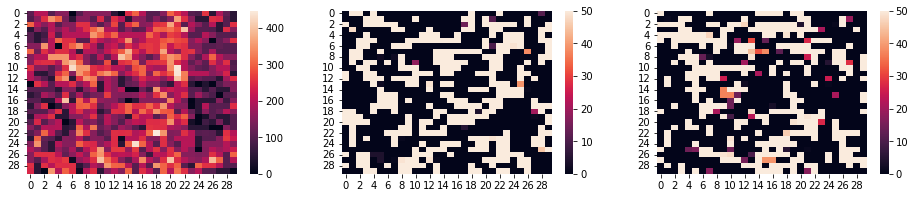

321.0


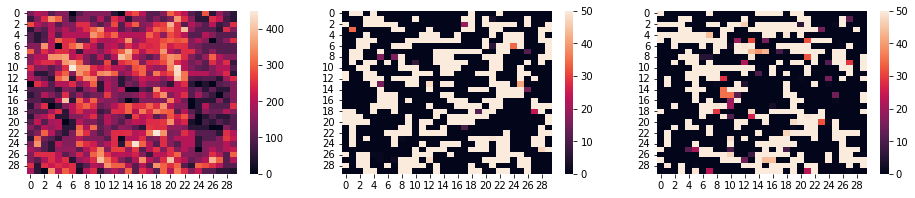

316.0


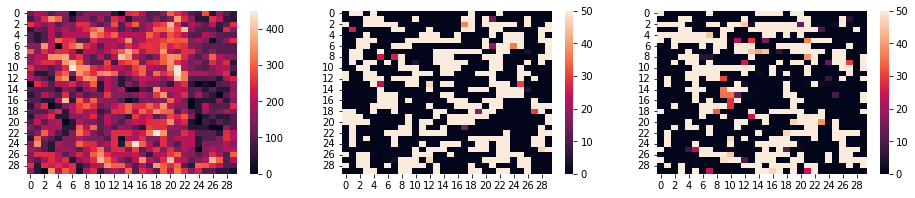

303.0


In [139]:
Agents = Run(30)

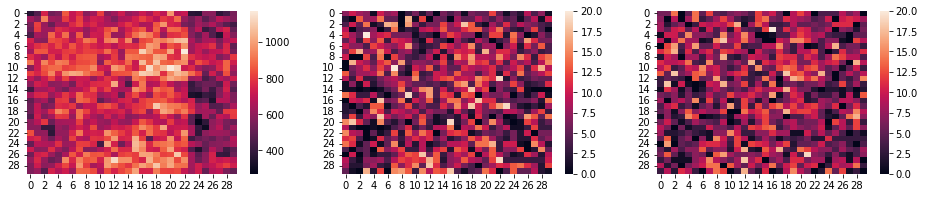

663.0


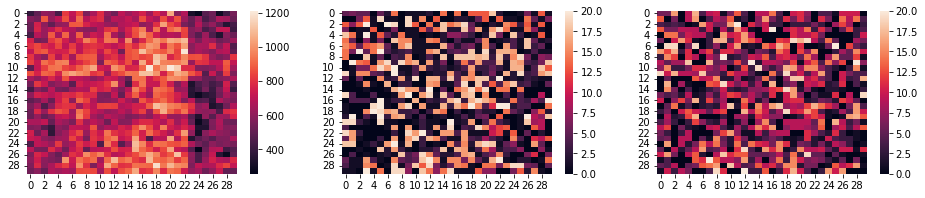

652.25


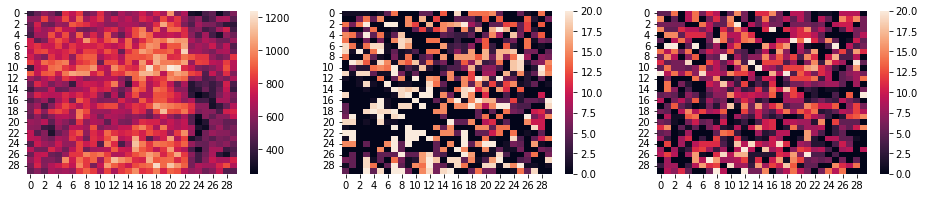

633.0


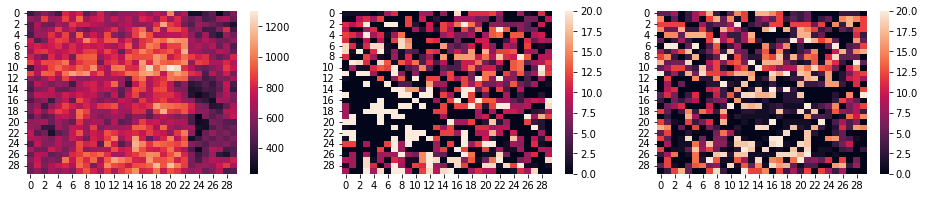

619.0


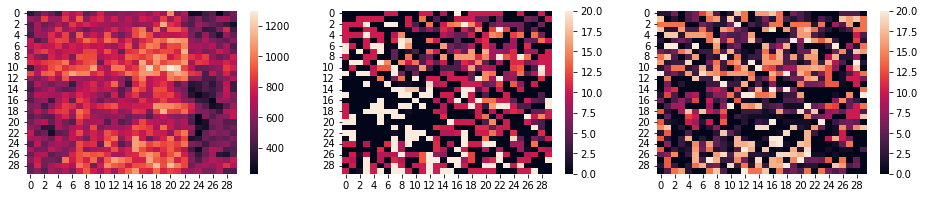

586.8


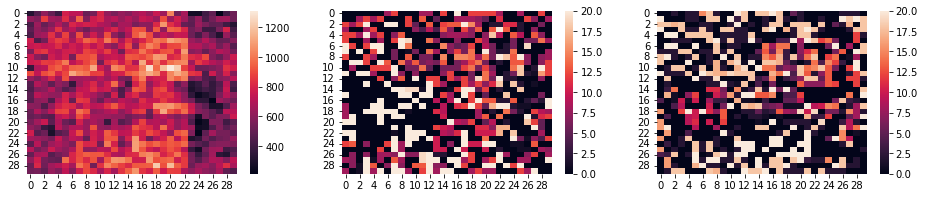

557.775


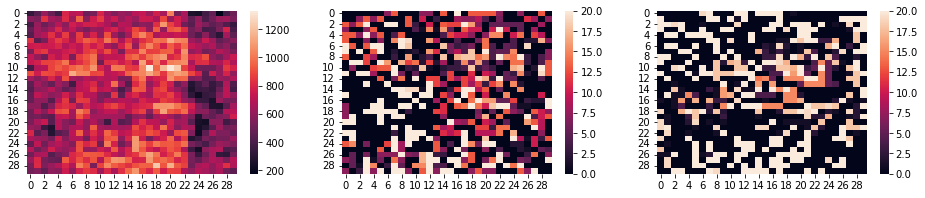

541.0


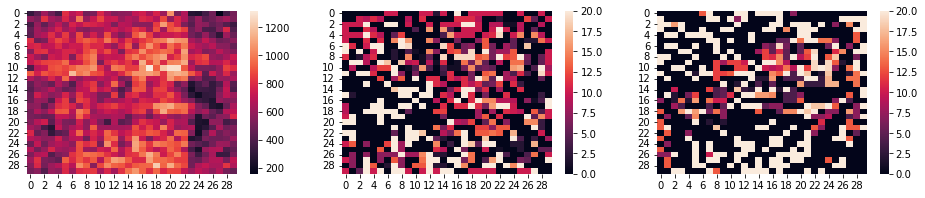

525.9333333333334


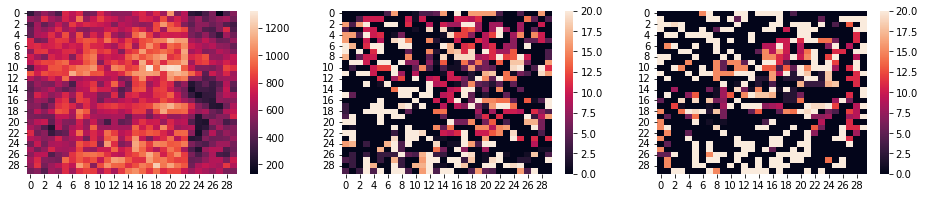

525.8


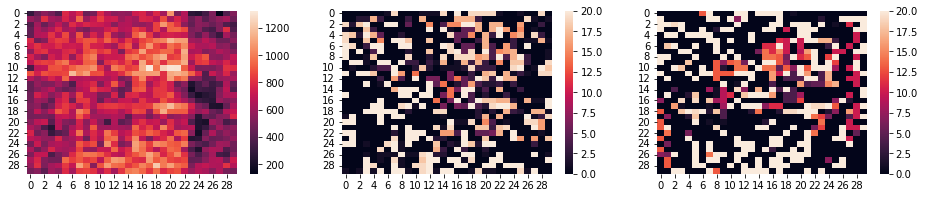

510.0


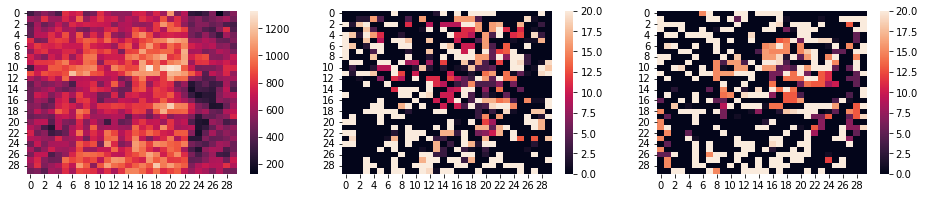

490.0


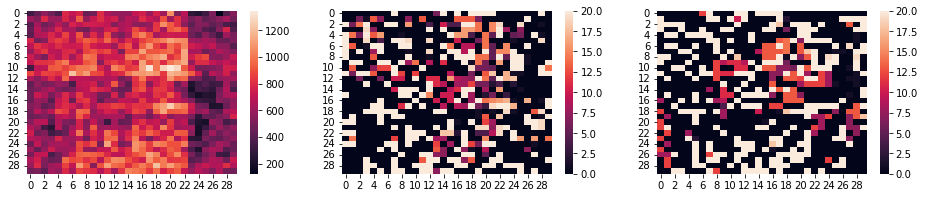

486.58333333333337


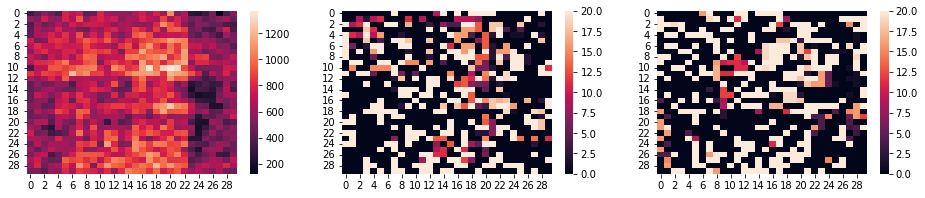

477.41666666666663


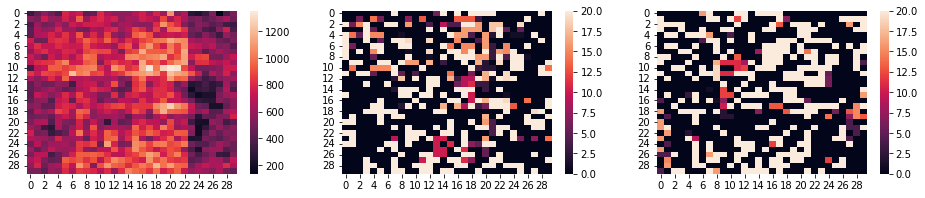

466.5


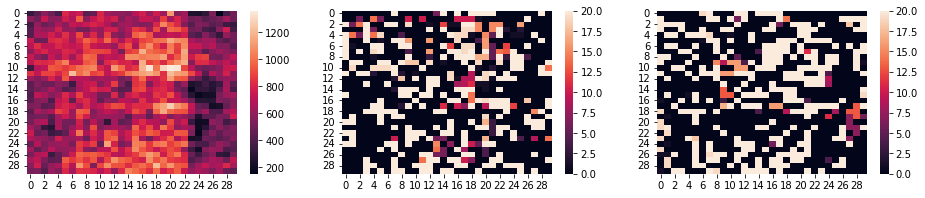

461.80833333333334


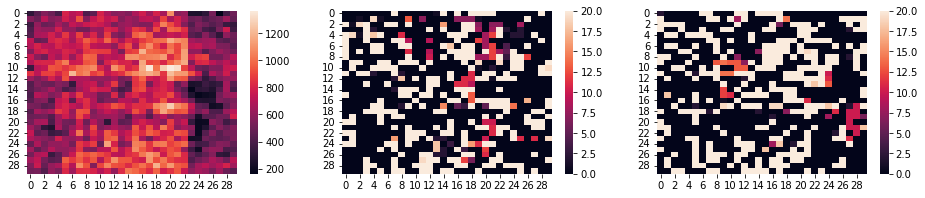

457.1333333333333


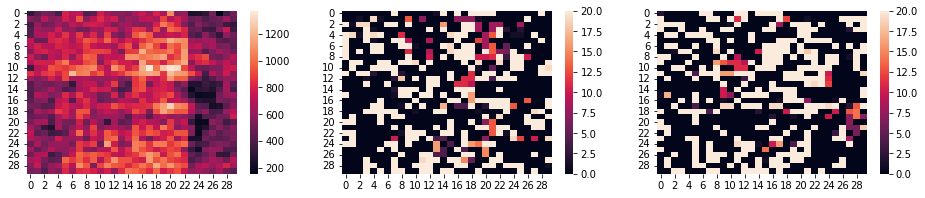

454.9583333333333


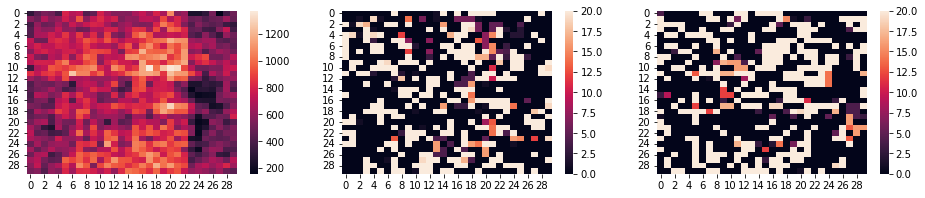

444.33333333333337


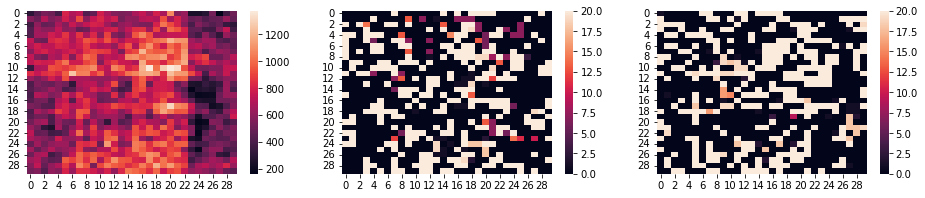

438.175


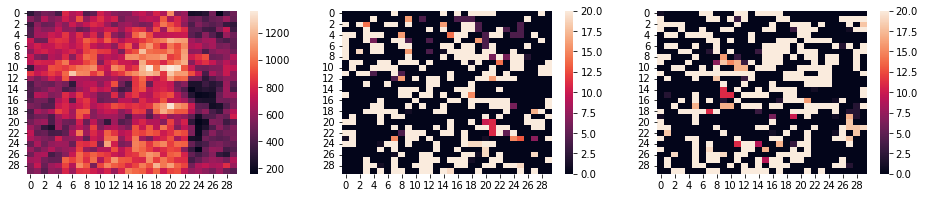

434.0


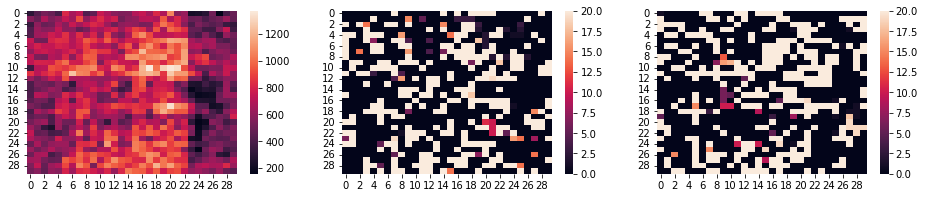

429.0


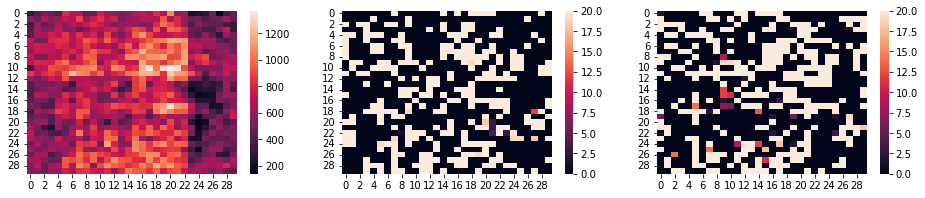

420.0


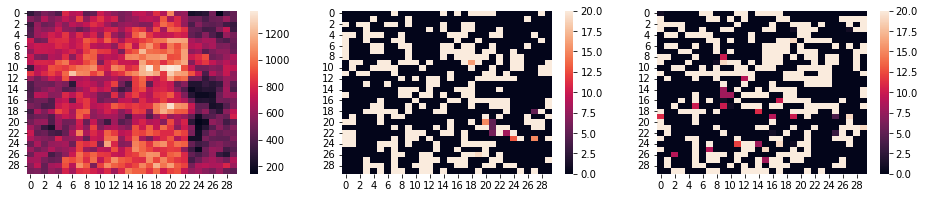

417.0


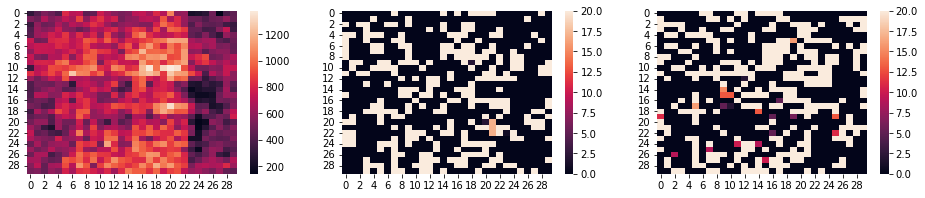

412.0


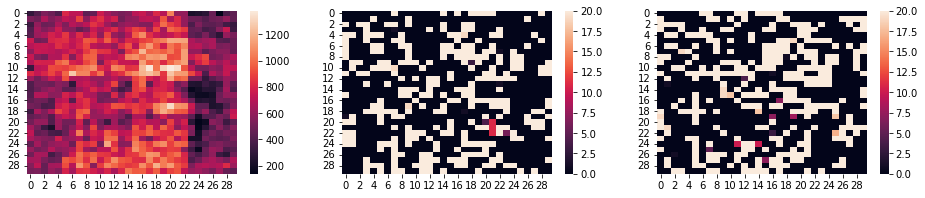

408.0


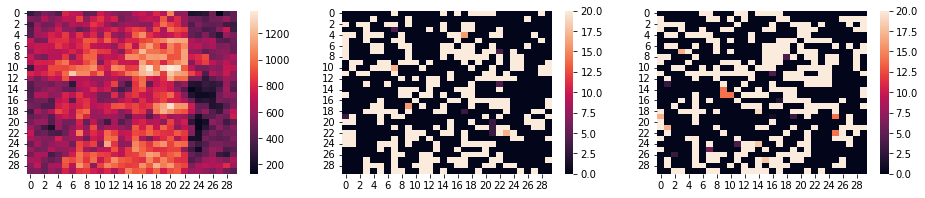

399.0


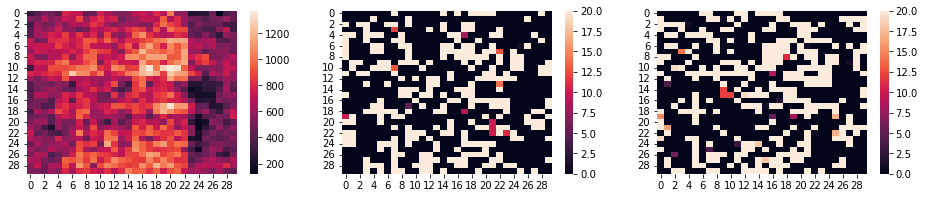

390.0


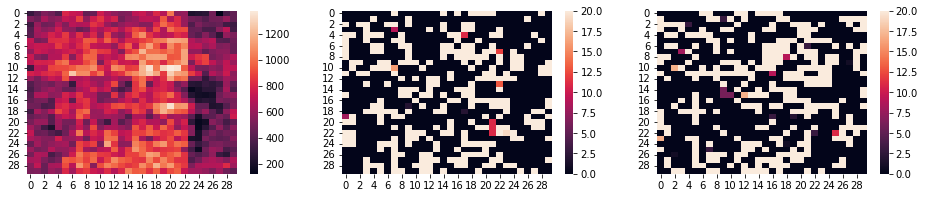

376.6428571428571


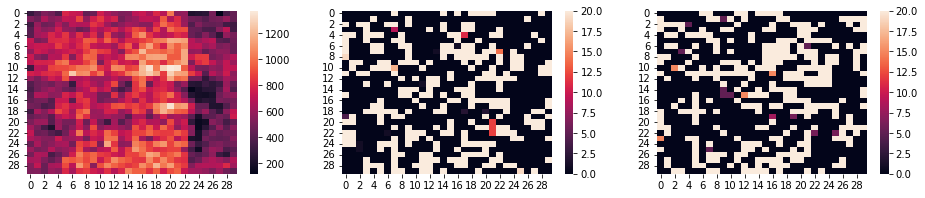

371.0


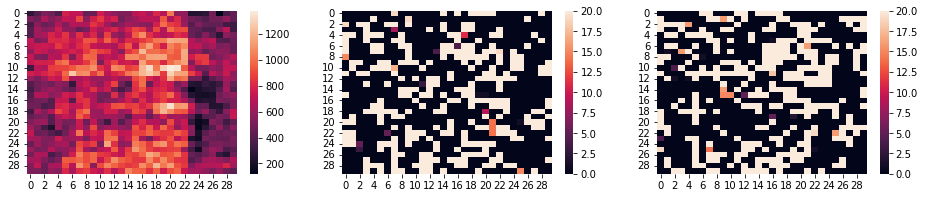

368.6428571428571


In [134]:
A = Run(30,shuffle_along_axis(Agents,0))

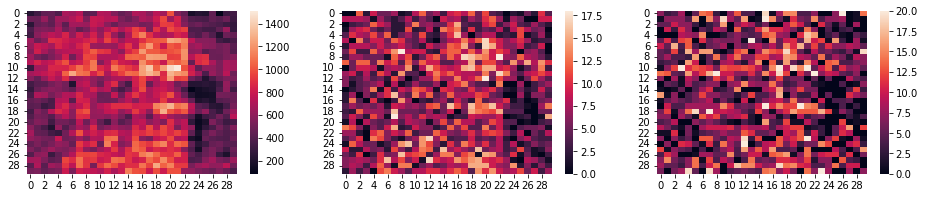

537.0


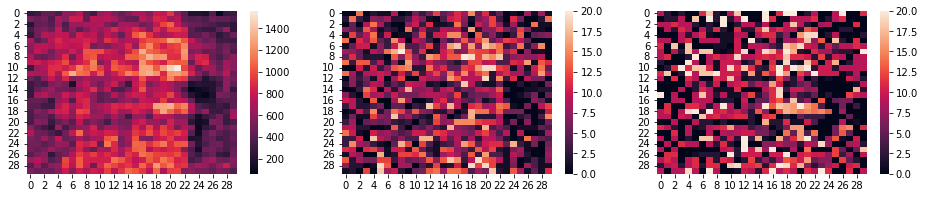

507.08730158730157


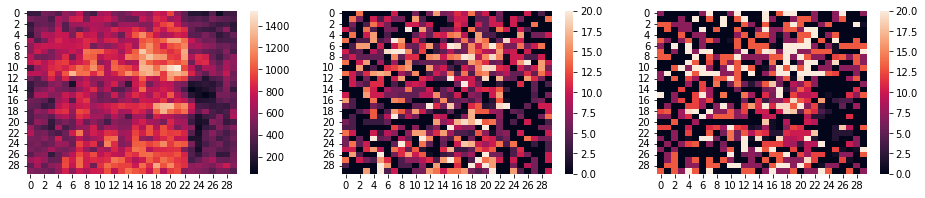

498.42857142857144


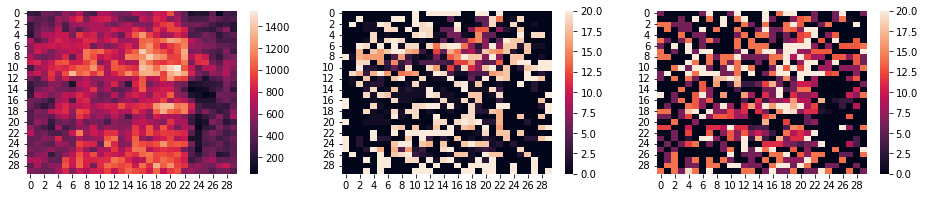

494.0


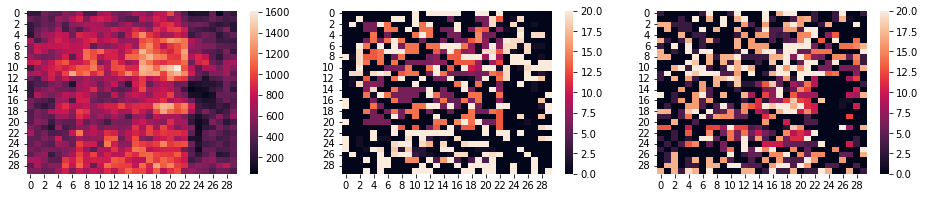

463.44444444444446


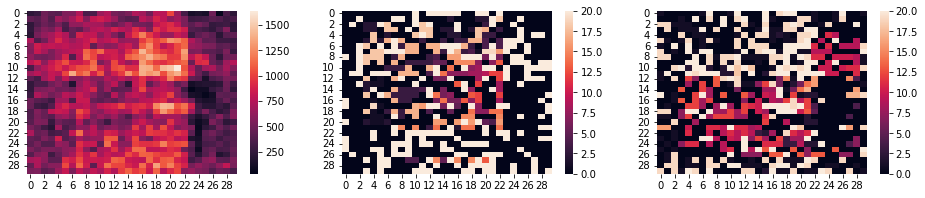

457.07142857142856


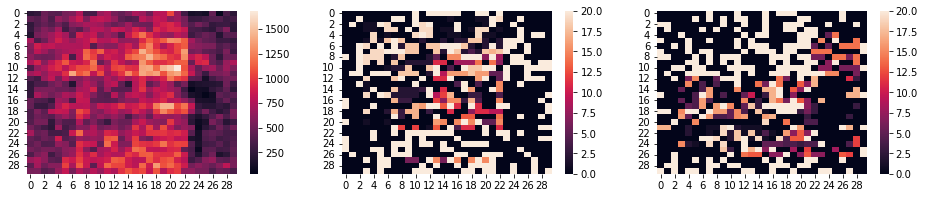

446.1118881118881


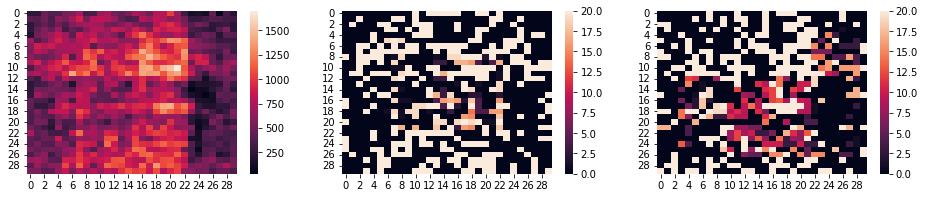

432.42857142857144


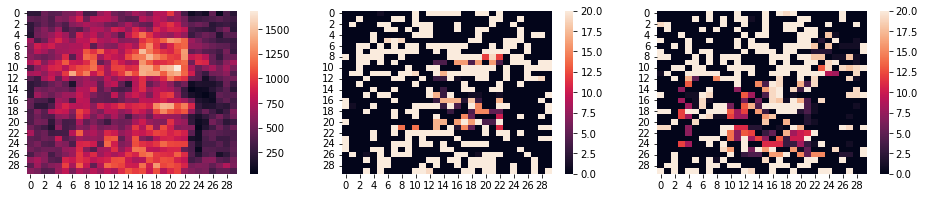

416.46153846153845


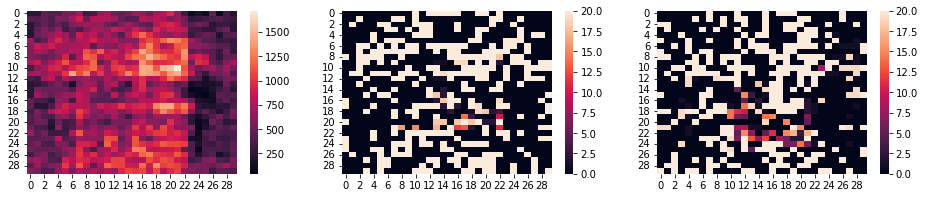

398.53846153846155


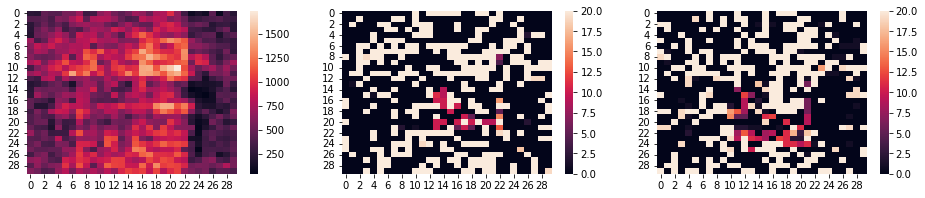

396.0


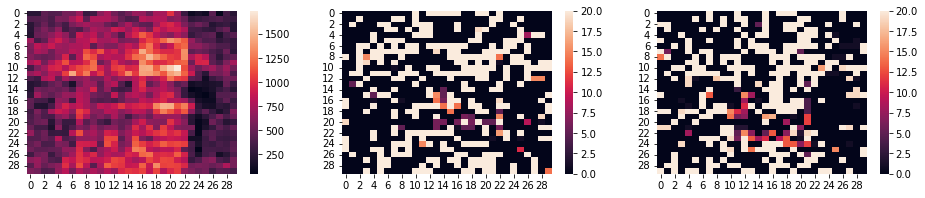

384.55555555555554


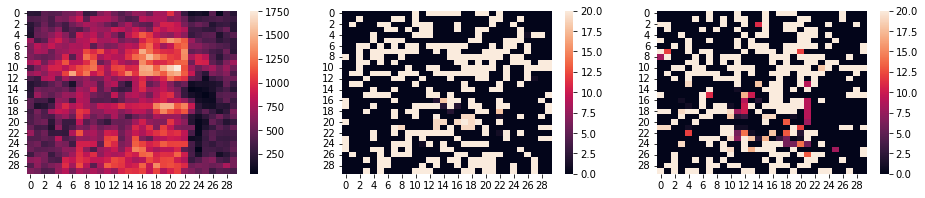

367.0


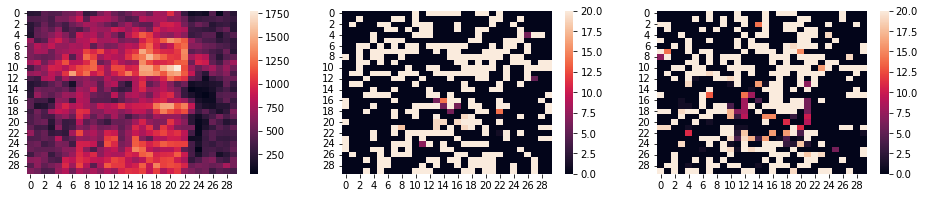

363.5


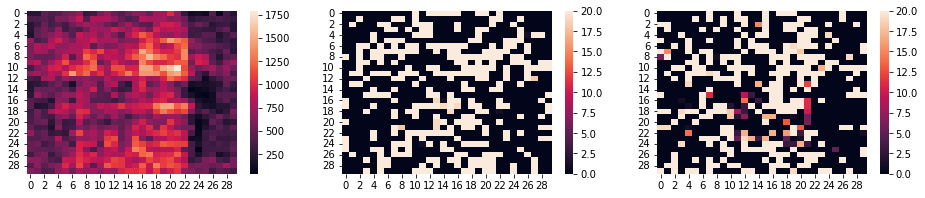

360.83333333333337


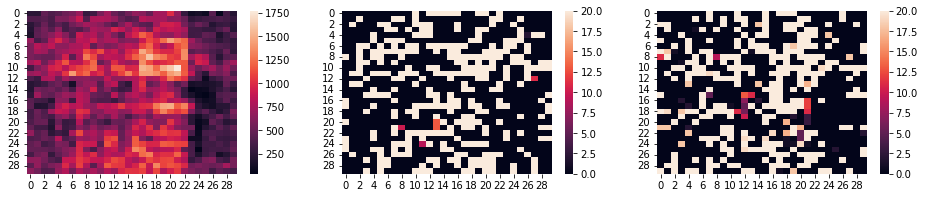

354.18055555555554


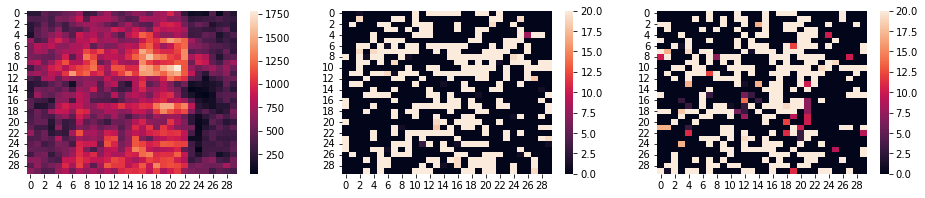

347.4166666666667


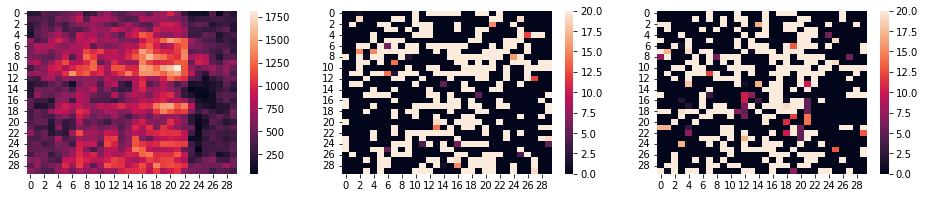

341.61111111111114


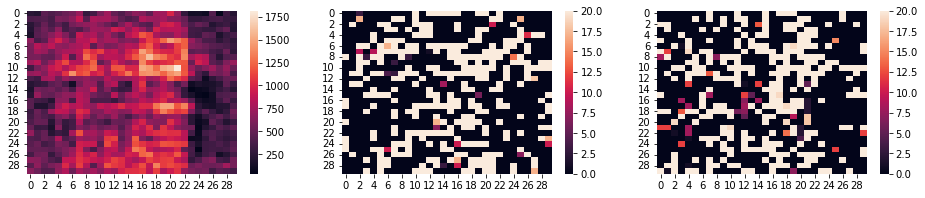

335.969696969697


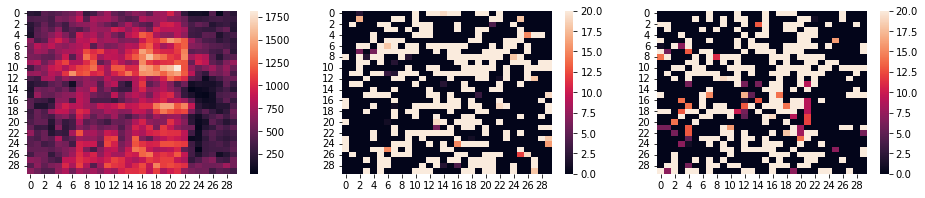

315.3333333333333


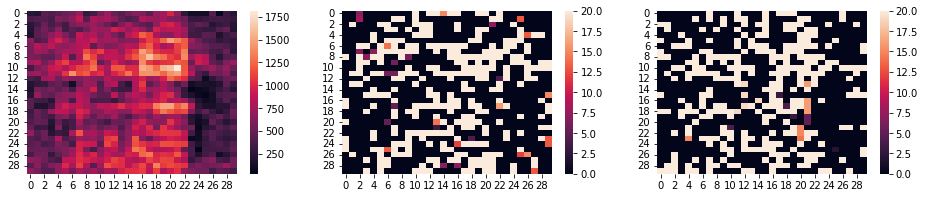

314.66666666666663


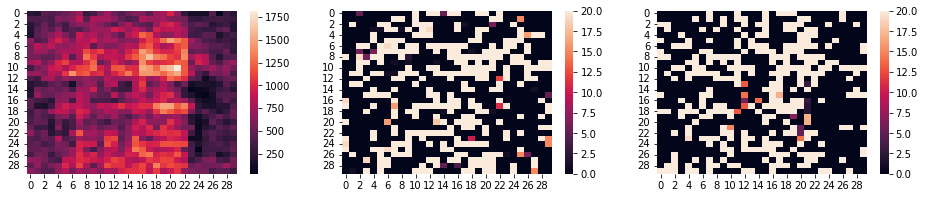

310.44444444444446


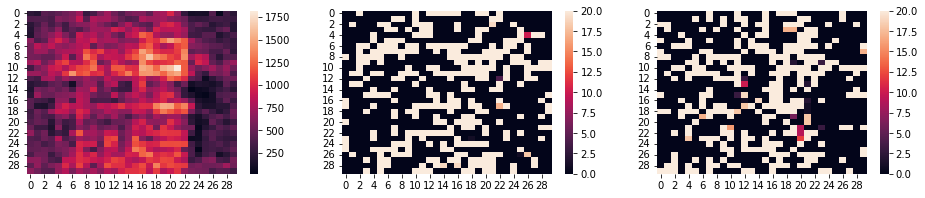

310.22222222222223


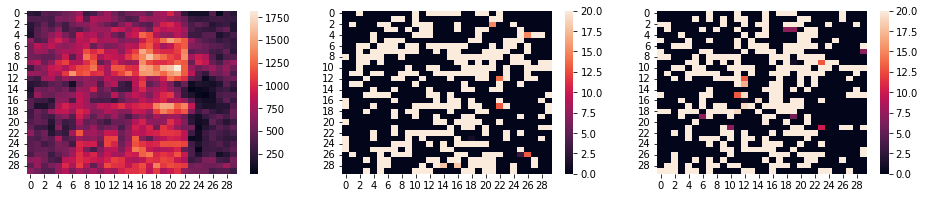

307.3333333333333


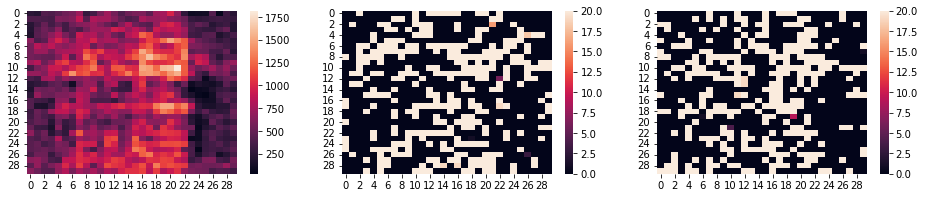

306.44444444444446


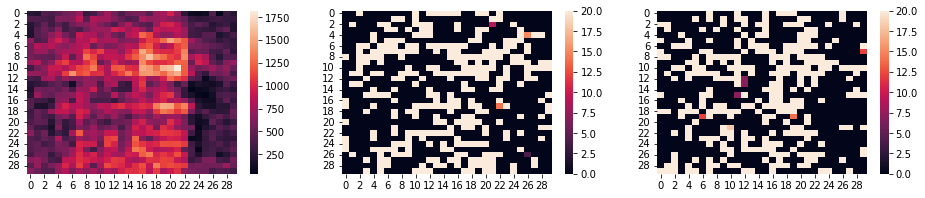

301.77777777777777


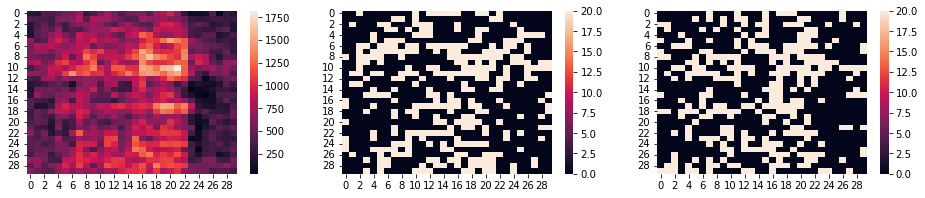

296.80555555555554


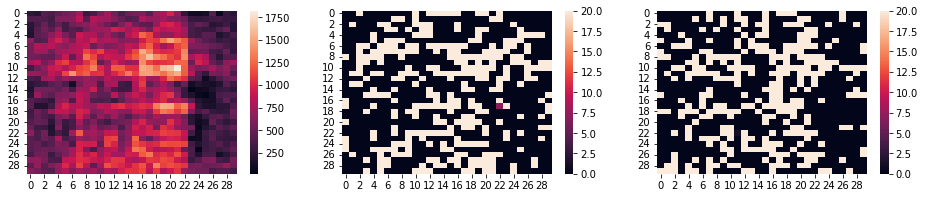

295.55555555555554


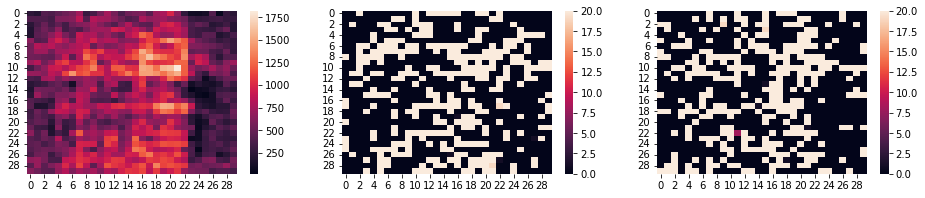

288.48333333333335


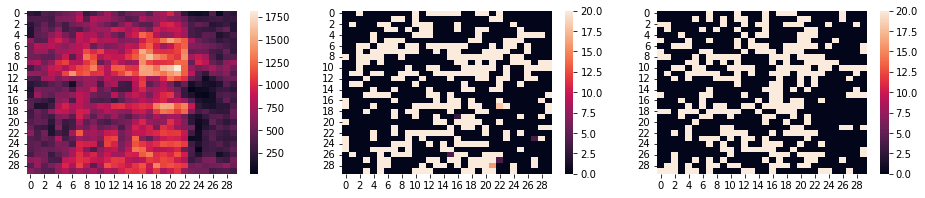

288.3222222222222


In [135]:
A = Run(30,shuffle_along_axis(A,0))

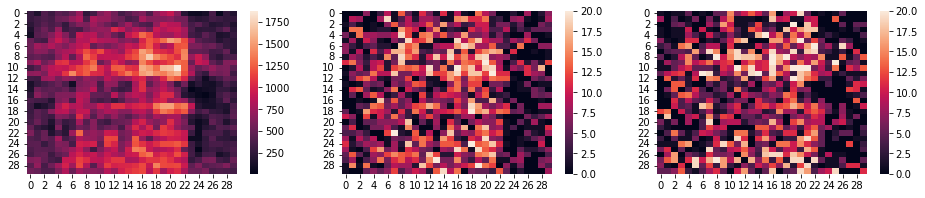

416.0


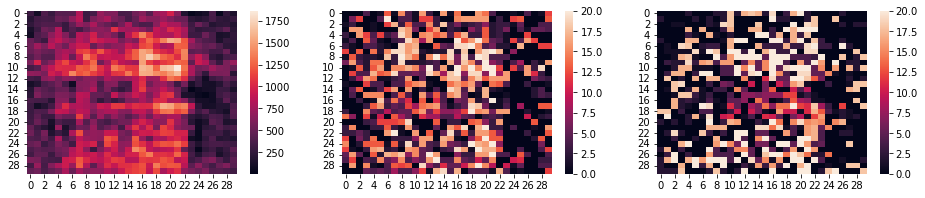

406.0


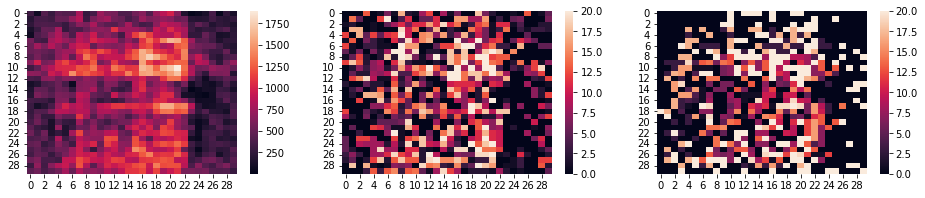

357.0


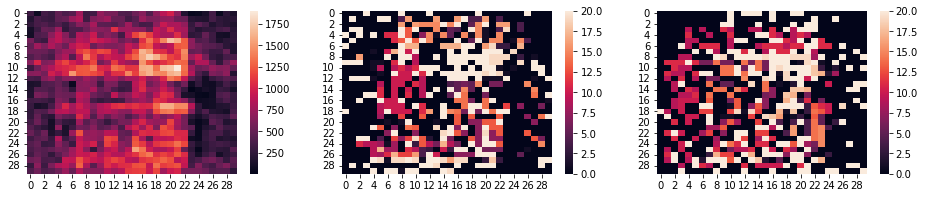

357.0


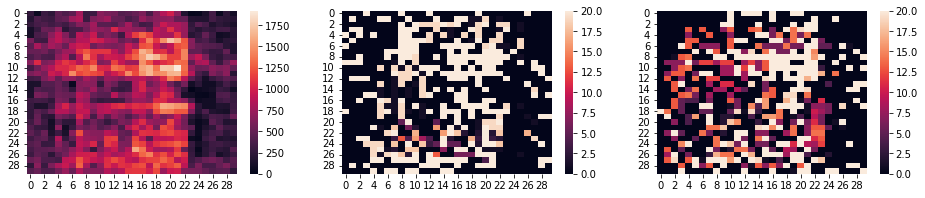

344.02857142857147


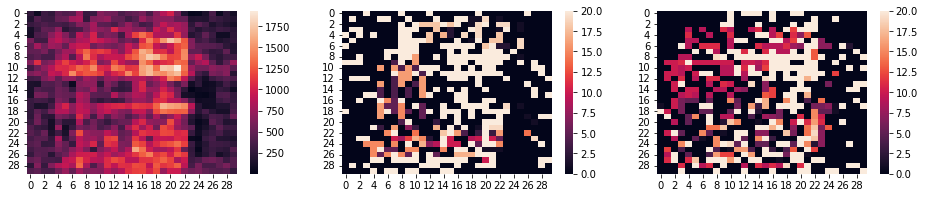

324.4769841269841


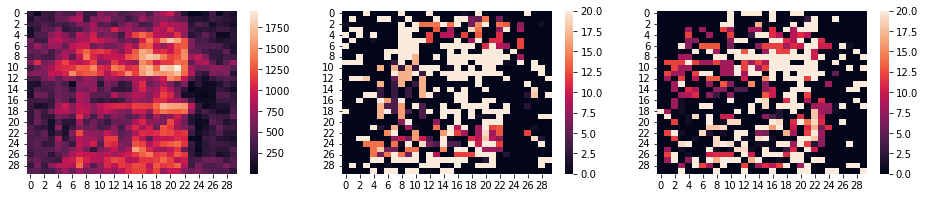

302.6968253968254


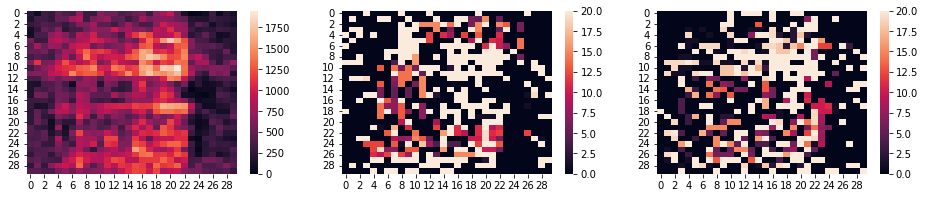

299.4547619047619


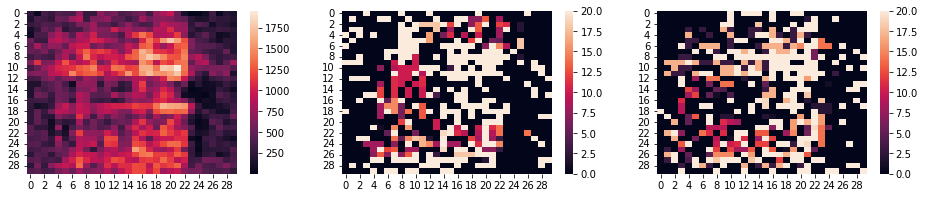

298.1047619047619


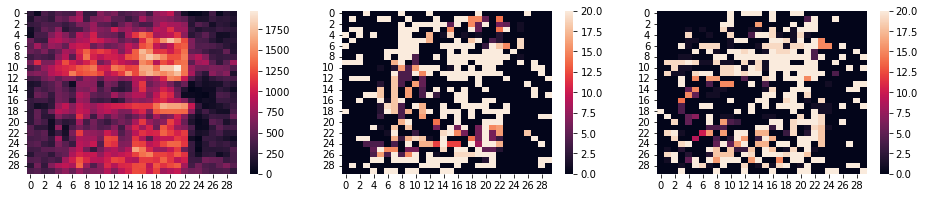

294.6634920634921


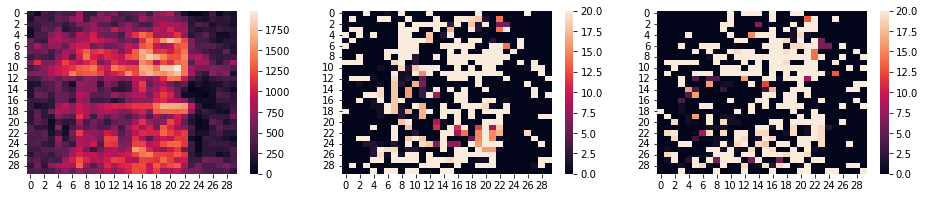

281.6698412698413


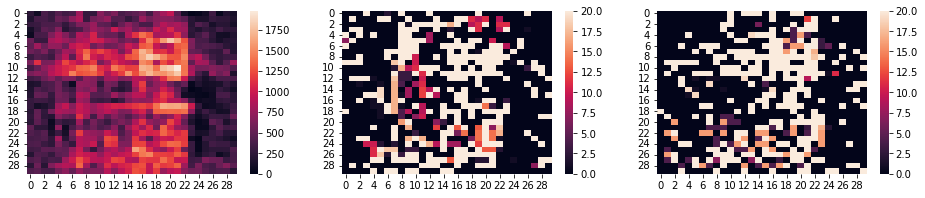

280.98571428571427


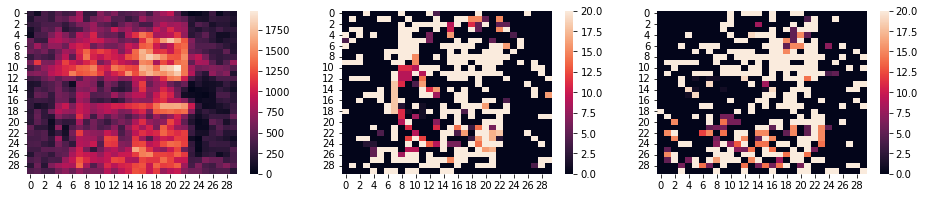

278.71746031746034


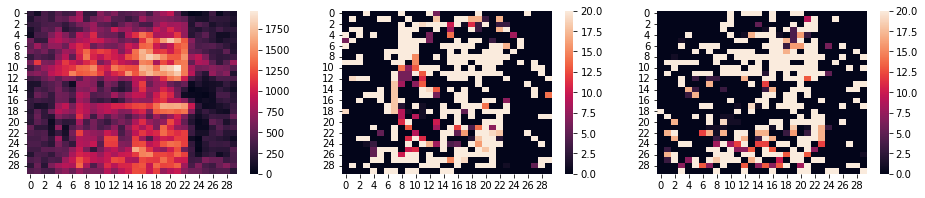

272.70427489177484


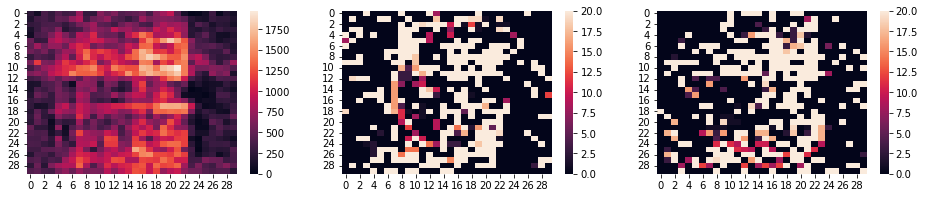

271.00243506493507


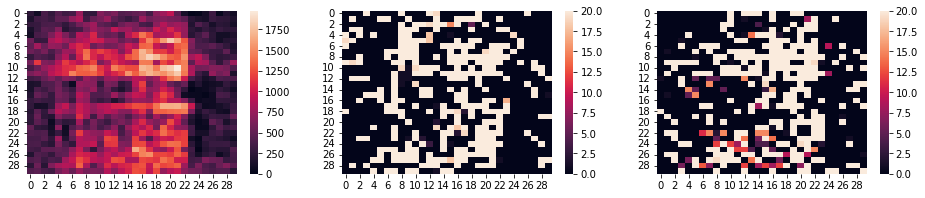

268.7183441558442


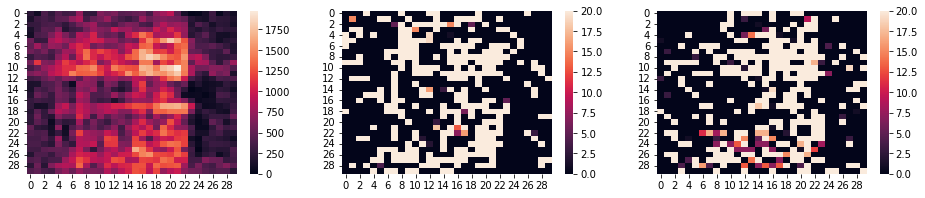

268.7970779220779


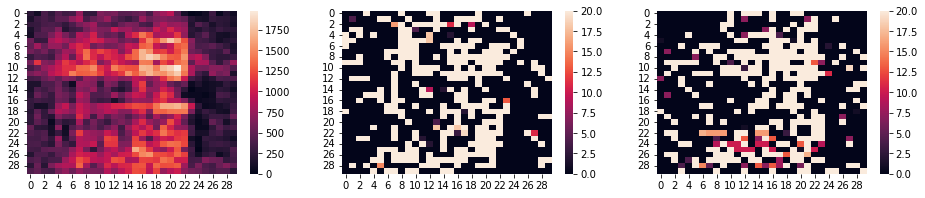

266.87175324675326


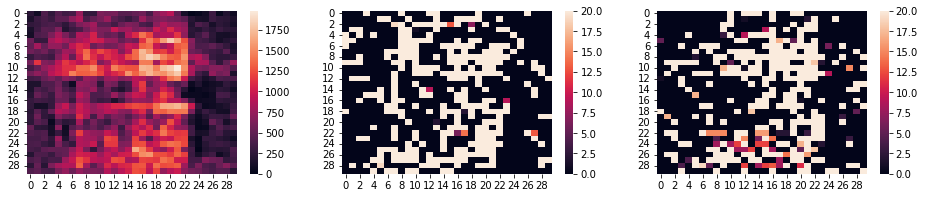

266.6672077922078


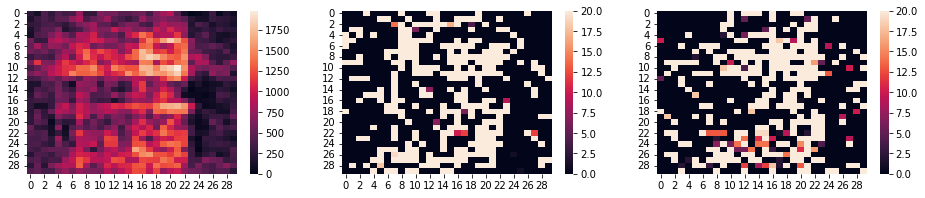

266.07142857142856


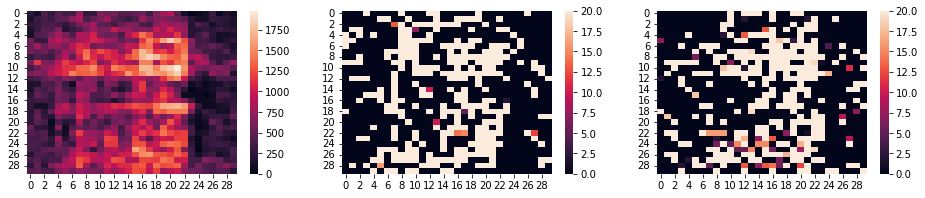

264.0289855072464


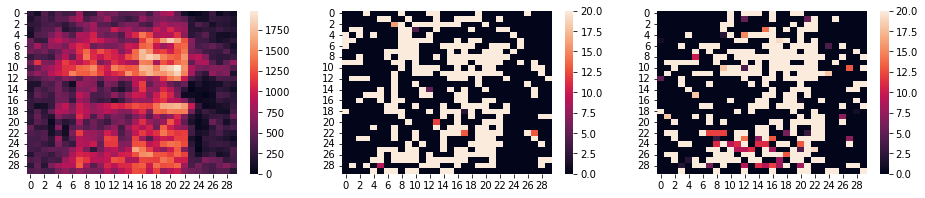

260.80676328502415


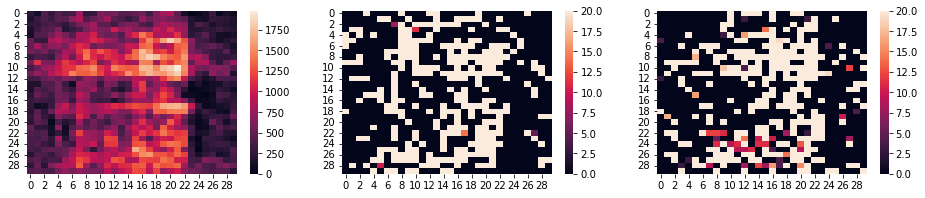

259.53743961352654


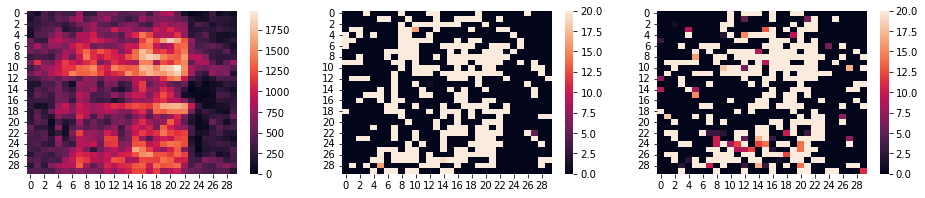

256.0169082125604


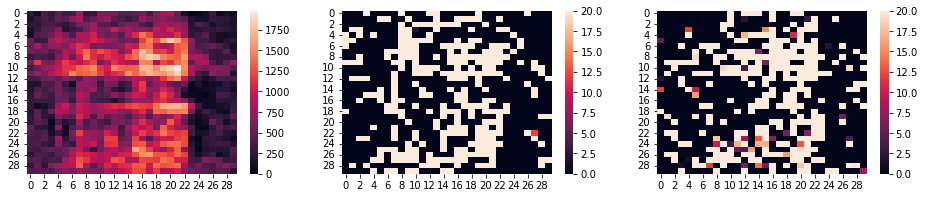

254.81038647342996


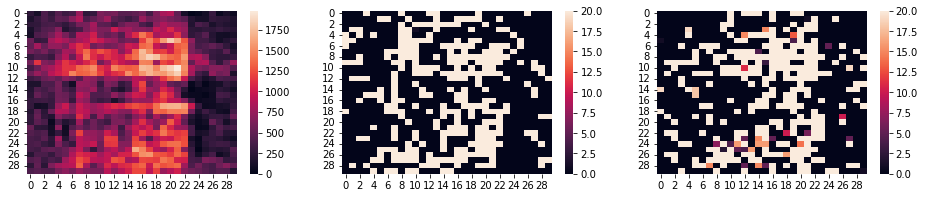

250.125


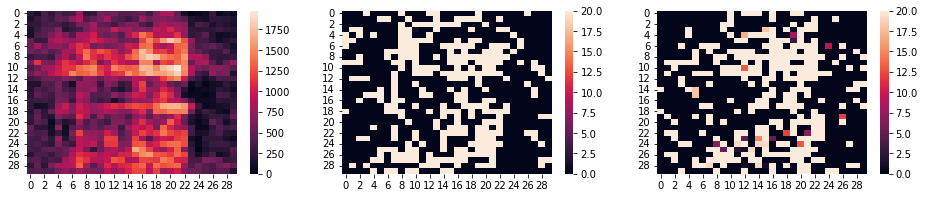

246.06884057971016


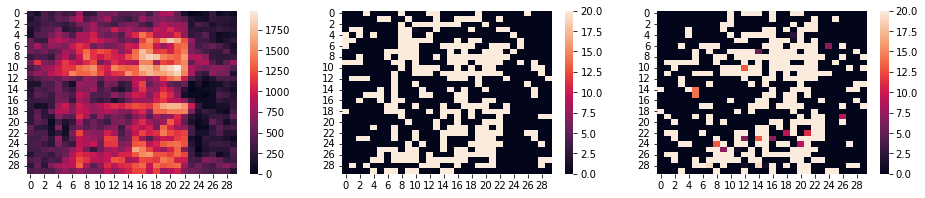

241.375


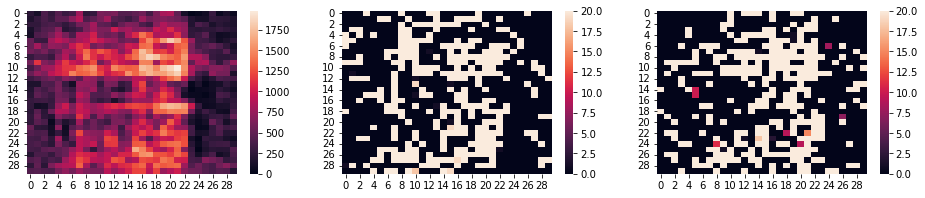

238.76328502415458


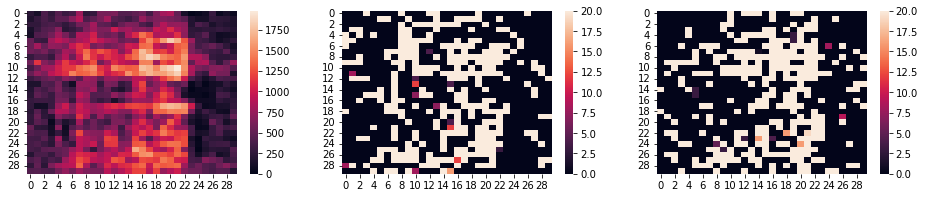

237.62077294685992


In [136]:
A = Run(30,shuffle_along_axis(A,0))

In [137]:
M.solution

'http://static.nonograms.org/files/nonograms/large/statuya_svobodi_12_1_1p.png'

In [140]:
!pwd

/Users/075072/Jupyter/Nonogram
